In [1]:
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt


df=pd.read_csv('C:/Users/Welcome/Downloads/cleaned_course_feedback.csv')

df1=pd.read_csv('C:/Users/Welcome/Downloads/cleaned_enrollment_data.csv')

df2=pd.read_csv('C:/Users/Welcome/Downloads/cleaned_unique_student_data.csv')
print(df1.head())
print(df.head())
print(df2.head())

  Student_ID       Name  Age  Gender   Location Enrolment_Date
0       S001  Student_1   24  Female    Kolkata     2023-11-24
1       S002  Student_2   32   Other    Chennai     2023-02-27
2       S003  Student_3   28   Other     Mumbai     2023-01-13
3       S004  Student_4   25  Female  Bangalore     2023-05-21
4       S005  Student_5   24   Other      Delhi     2023-05-06
  Student_ID Course_ID  Rating       Feedback_Text
0       S057     UX303       2      Too fast-paced
1       S063     PY202       2  Loved the examples
2       S022     PY202       4     Could be better
3       S011     PY202       5   Needs improvement
4       S073     WD404       4     Could be better
  Student_ID Course_ID        Date  Time_Spent_Minutes  Completion_Percentage
0       S001     PY202  2024-01-05                  90                  46.10
1       S001     DM101  2024-01-28                 155                  88.87
2       S001     UX303  2024-01-28                 177                  54.93
3   

What is the overall average completion rate across courses?




In [11]:
average_completion = df2['Completion_Percentage'].mean()
print(average_completion)


54.77871016691957


Which course has the highest and lowest average engagement
time?

In [16]:
avg_engagement = df2.groupby('Course_ID')['Time_Spent_Minutes'].mean()
print(avg_engagement)

highest_course = avg_engagement.idxmax()
highest_avg = avg_engagement.max()

lowest_course = avg_engagement.idxmin()
lowest_avg = avg_engagement.min()

print("Highest Avg Engagement:", highest_course, highest_avg)
print("Lowest Avg Engagement:", lowest_course, lowest_avg)

Course_ID
DM101    102.427673
PY202     93.902439
UX303     99.816568
WD404     96.419162
Name: Time_Spent_Minutes, dtype: float64
Highest Avg Engagement: DM101 102.42767295597484
Lowest Avg Engagement: PY202 93.90243902439025


How does engagement differ by age group or location?

In [3]:
df_age_location=pd.read_csv('C:/Users/Welcome/Downloads/cleaned_enrollment_data.csv')
print(df_age_location)

df_time=pd.read_csv('C:/Users/Welcome/Downloads/cleaned_unique_student_data.csv')
print(df_time)

df4 = pd.merge(df_time, df_age_location, on="Student_ID")
print(df4)











   Student_ID         Name  Age  Gender   Location Enrolment_Date
0        S001    Student_1   24  Female    Kolkata     2023-11-24
1        S002    Student_2   32   Other    Chennai     2023-02-27
2        S003    Student_3   28   Other     Mumbai     2023-01-13
3        S004    Student_4   25  Female  Bangalore     2023-05-21
4        S005    Student_5   24   Other      Delhi     2023-05-06
..        ...          ...  ...     ...        ...            ...
95       S096   Student_96   32   Other    Chennai     2023-12-19
96       S097   Student_97   31   Other    Chennai     2023-10-13
97       S098   Student_98   20   Other    Kolkata     2023-04-23
98       S099   Student_99   18    Male    Kolkata     2023-12-17
99       S100  Student_100   22   Other  Bangalore     2023-06-16

[100 rows x 6 columns]
    Student_ID Course_ID        Date  Time_Spent_Minutes  \
0         S001     PY202  2024-01-05                  90   
1         S001     DM101  2024-01-28                 155   
2   

What is the average feedback rating per course?


In [5]:
average_rating = df.groupby("Course_ID")["Rating"].mean().reset_index()

print(average_rating)


  Course_ID    Rating
0     DM101  2.900000
1     PY202  3.277778
2     UX303  2.923077
3     WD404  2.789474


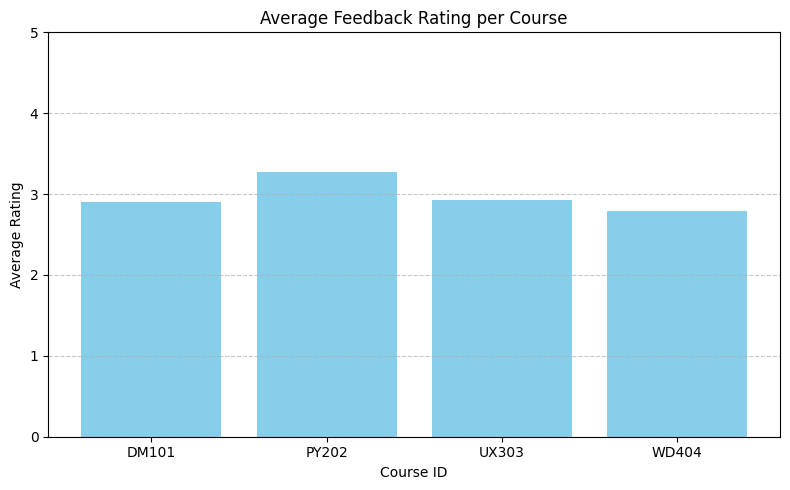

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(average_rating["Course_ID"], average_rating["Rating"], color='skyblue')
plt.xlabel("Course ID")
plt.ylabel("Average Rating")
plt.title("Average Feedback Rating per Course")
plt.ylim(0, 5)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Is there a correlation between completion rate and feedback rating?

In [19]:
merged_df = pd.merge(df2, df, on=["Student_ID", "Course_ID"])

print(merged_df)

correlation = merged_df["Rating"].corr(merged_df["Completion_Percentage"])
print(merged_df.columns)
merged_df["Rating"] = pd.to_numeric(merged_df["Rating"], errors="coerce")
merged_df["Completion_Percentage"] = pd.to_numeric(merged_df["Completion_Percentage"], errors="coerce")

merged_df = merged_df.dropna(subset=["Rating", "Completion_Percentage"])

correlation = merged_df["Rating"].corr(merged_df["Completion_Percentage"])
print("Correlation between completion rate and feedback rating:", correlation)








    Student_ID Course_ID        Date  Time_Spent_Minutes  \
0         S002     PY202  2024-02-03                  45   
1         S002     PY202  2024-03-06                 136   
2         S005     DM101  2024-01-30                  27   
3         S006     DM101  2024-03-27                 177   
4         S006     DM101  2024-01-08                 113   
..         ...       ...         ...                 ...   
117       S095     DM101  2024-02-26                 125   
118       S097     PY202  2024-01-27                  81   
119       S097     PY202  2024-02-16                  93   
120       S099     WD404  2024-02-23                 162   
121       S099     WD404  2024-02-24                  57   

     Completion_Percentage  Rating       Feedback_Text  
0                    32.20       3     Well structured  
1                    18.18       3     Well structured  
2                    91.49       4  Loved the examples  
3                    98.57       1  Loved the examp

Identify top 3 student segments based on engagement and
satisfaction.

In [23]:
import pandas as pd


student_engagement = df2.groupby("Student_ID").agg({
    "Time_Spent_Minutes": "sum",
    "Completion_Percentage": "mean"
}).reset_index()


student_engagement["Time_Spent_Scaled"] = (
    (student_engagement["Time_Spent_Minutes"] - student_engagement["Time_Spent_Minutes"].min()) /
    (student_engagement["Time_Spent_Minutes"].max() - student_engagement["Time_Spent_Minutes"].min())
)

student_engagement["Completion_Scaled"] = (
    (student_engagement["Completion_Percentage"] - student_engagement["Completion_Percentage"].min()) /
    (student_engagement["Completion_Percentage"].max() - student_engagement["Completion_Percentage"].min())
)


student_engagement["Engagement_Score"] = (
    student_engagement["Time_Spent_Scaled"] + student_engagement["Completion_Scaled"]
) / 2


top_3 = student_engagement.sort_values(by="Engagement_Score", ascending=False).head(3)

print(top_3[["Student_ID", "Time_Spent_Minutes", "Completion_Percentage", "Engagement_Score"]])


   Student_ID  Time_Spent_Minutes  Completion_Percentage  Engagement_Score
84       S085                 979              80.590000          0.849914
49       S050                1033              69.856250          0.760516
51       S052                 768              80.288571          0.756273


In [2]:



# Merge top students with the original dataframe to see their feedback texts
top_feedbacks = df[df["Student_ID"].isin(top_3_students["Student_ID"])]
print(top_feedbacks[["Student_ID", "Rating", "Feedback_Text"]])


NameError: name 'top_3_students' is not defined